<a href="https://colab.research.google.com/github/Pageblan/Decision-Trees/blob/main/MagicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

The program was run with parameters allowing to observe events with energies down to below 50 GeV.

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "FM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04[2].data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
print(df.isnull().sum())
print(df['class'].unique())

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
FM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64
['g' 'h']


In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


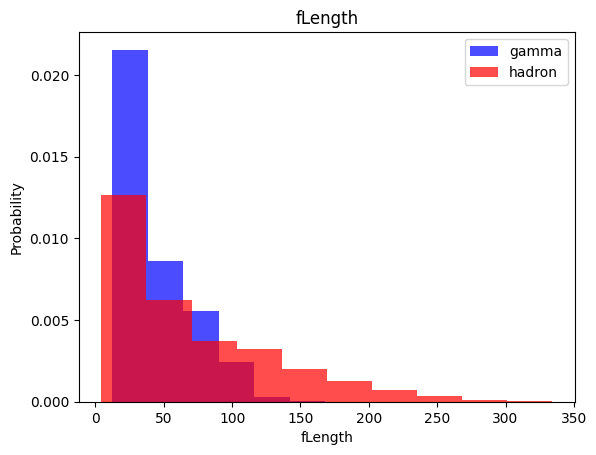

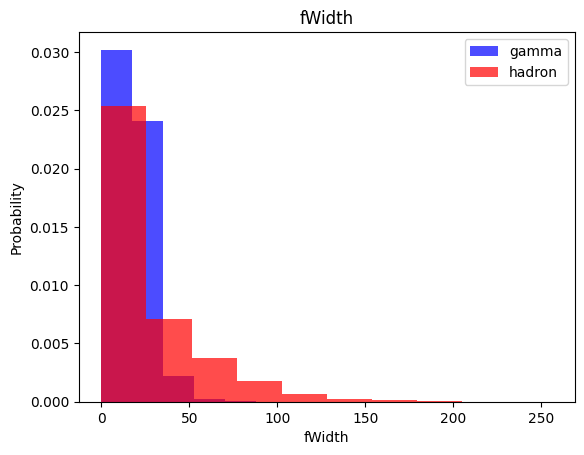

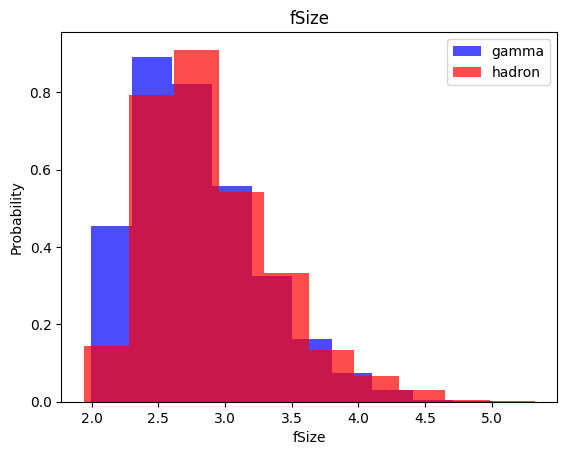

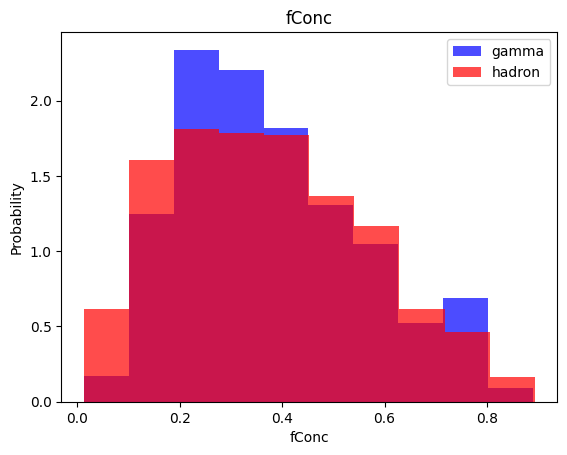

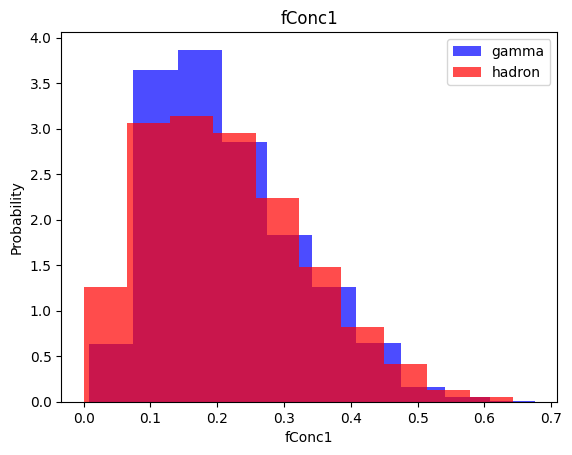

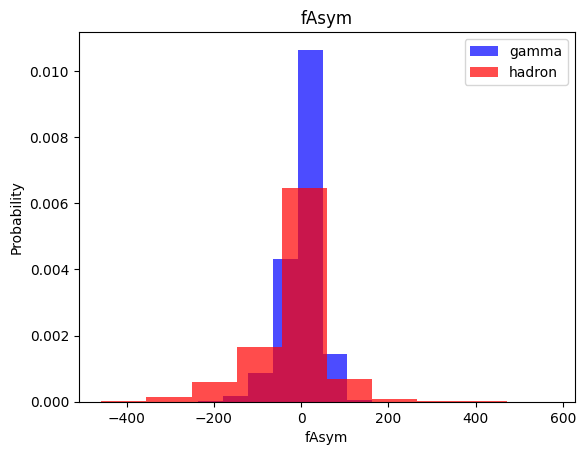

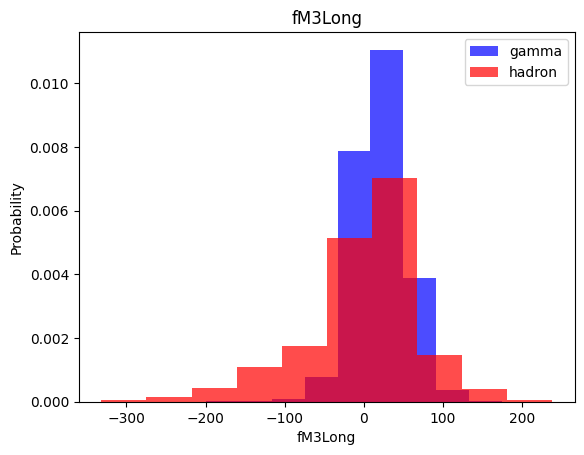

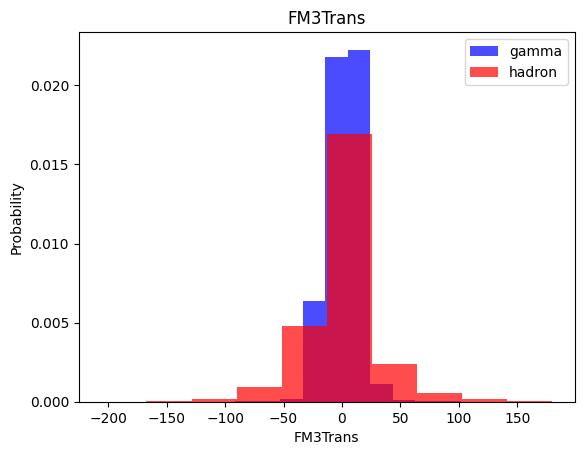

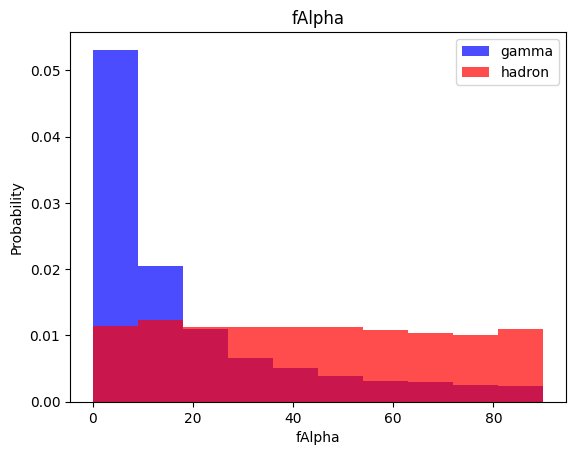

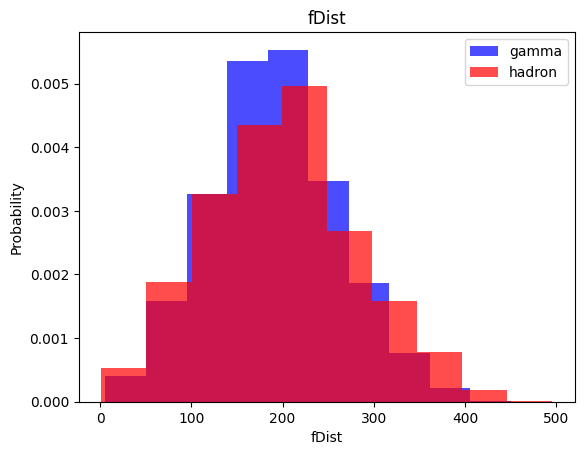

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train,validation, test dataset

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
  # Extract features and target
  x = dataframe[dataframe.columns [:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  # Initialize the StandardScaler
  scaler = StandardScaler()

  # Fit and transform the features
  x = scaler.fit_transform(x)

  # Apply oversampling if needed
  if oversample:
    ros = RandomOverSampler(random_state=42)
    x, y = ros.fit_resample(x, y)

  # Combine the scaled features and target into one dataset
  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [ ]:
print(len(train[train["class"]==1])) #gamma
print(len(train[train["class"]==0]))

7403
4009


In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True)#x and x_train are the same
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test,  x_test,  y_test  = scale_dataset(test,  oversample=False)

By now the data is properly formatted

Using  KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 82.26%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1341
           1       0.86      0.87      0.86      2463

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 985  356]
 [ 319 2144]]


In [ ]:
y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
y_test

array([1, 0, 1, ..., 1, 0, 1])

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

y_pred = nb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.11%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.42      0.52      1341
           1       0.74      0.90      0.81      2463

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

y_pred = lg_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.63%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1341
           1       0.84      0.83      0.83      2463

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



Support Vector

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv_model = SVC()
sv_model.fit(x_train, y_train)

y_pred = sv_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.49%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1341
           1       0.89      0.91      0.90      2463

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(x_train, y_train,num_nodes, dropout_prob, lr, epochs, batch_size):
    nn_model= tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')#projecting our predictions to zero or one
    ])

    #nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    nn_model.compile(optimizer= tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(
        #x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid))
        x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    return nn_model, history

num_nodes: 16, dropout_prob: 0, lr: 0.01, batch_size: 32


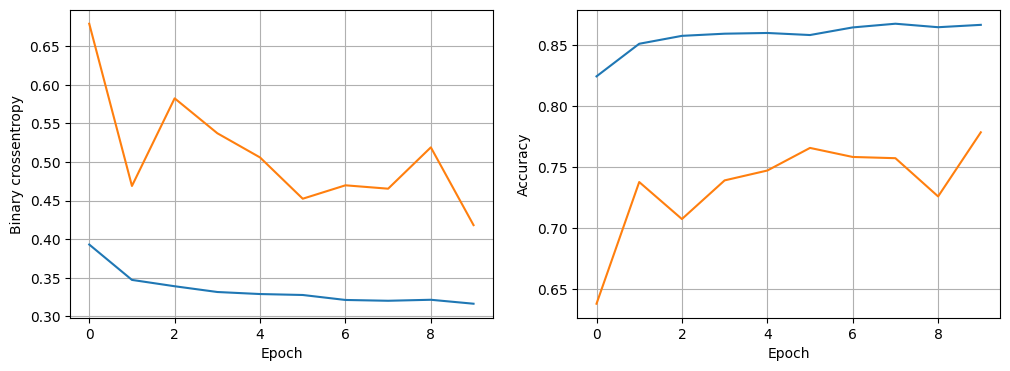

119/119 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8573
num_nodes: 16, dropout_prob: 0, lr: 0.01, batch_size: 64


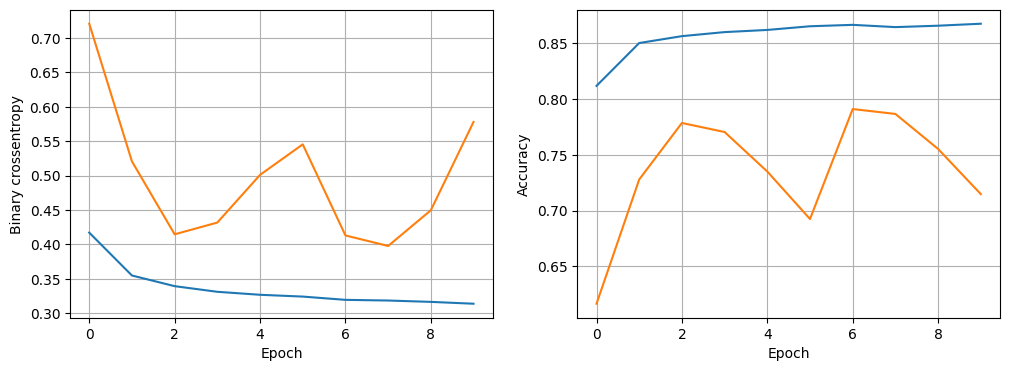

119/119 [==============================] - 0s 3ms/step - loss: 0.3194 - accuracy: 0.8649
num_nodes: 16, dropout_prob: 0, lr: 0.01, batch_size: 128


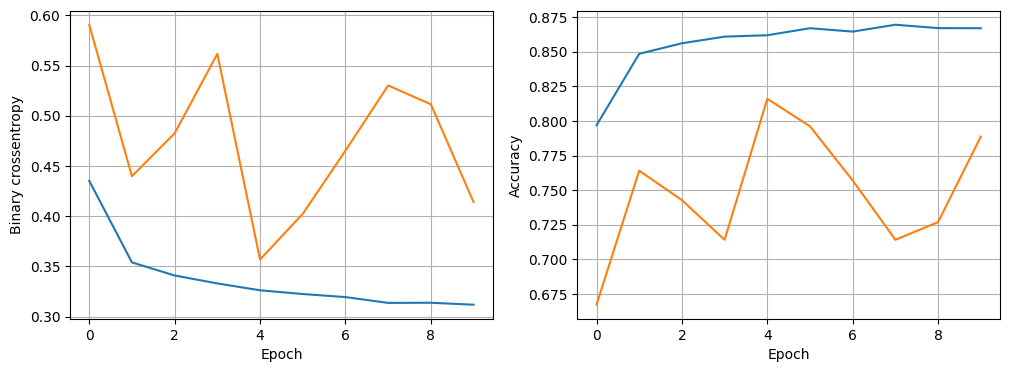

119/119 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8659
num_nodes: 16, dropout_prob: 0, lr: 0.005, batch_size: 32


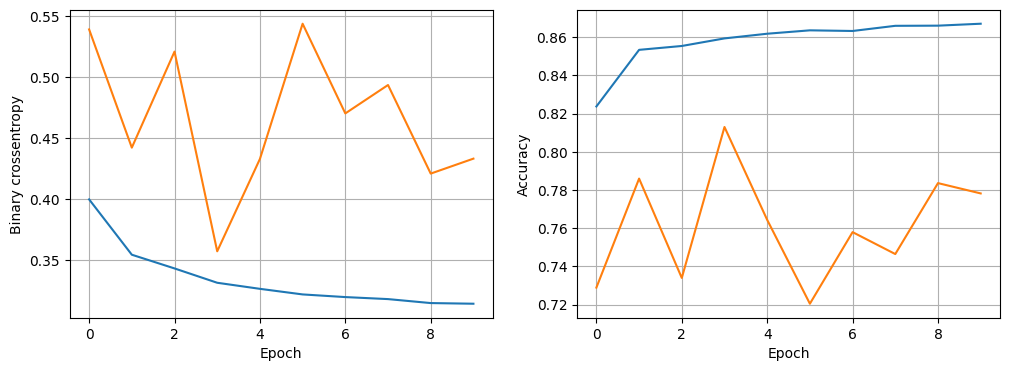

119/119 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8659
num_nodes: 16, dropout_prob: 0, lr: 0.005, batch_size: 64


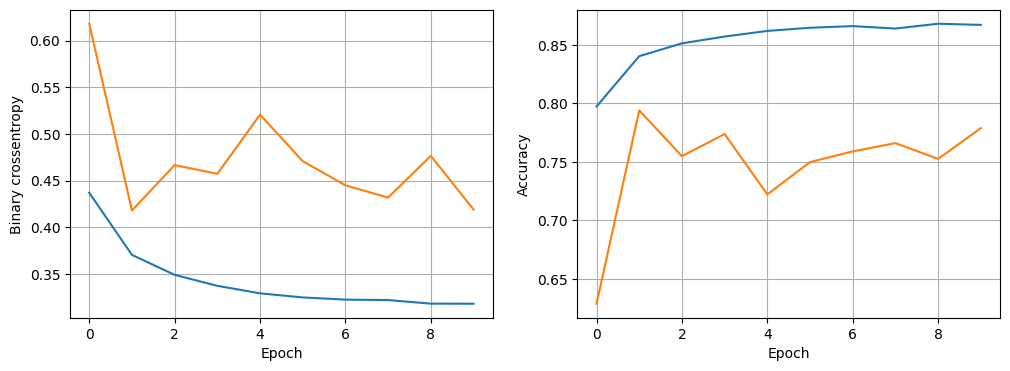

119/119 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8654
num_nodes: 16, dropout_prob: 0, lr: 0.005, batch_size: 128


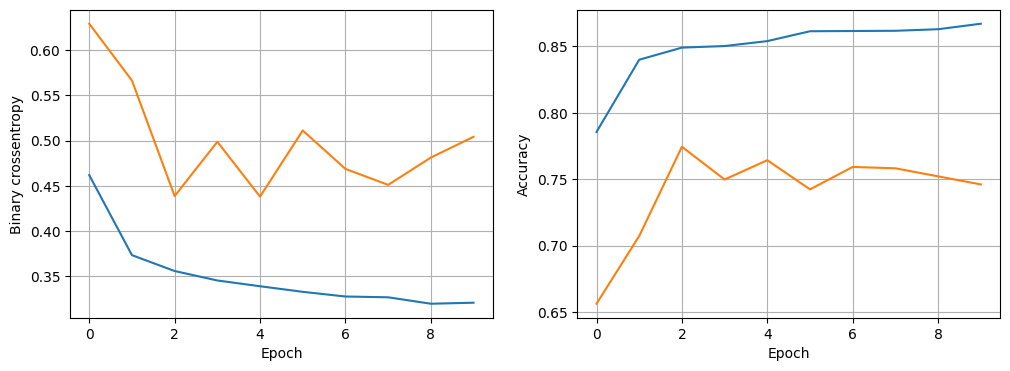

119/119 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8636
num_nodes: 16, dropout_prob: 0, lr: 0.001, batch_size: 32


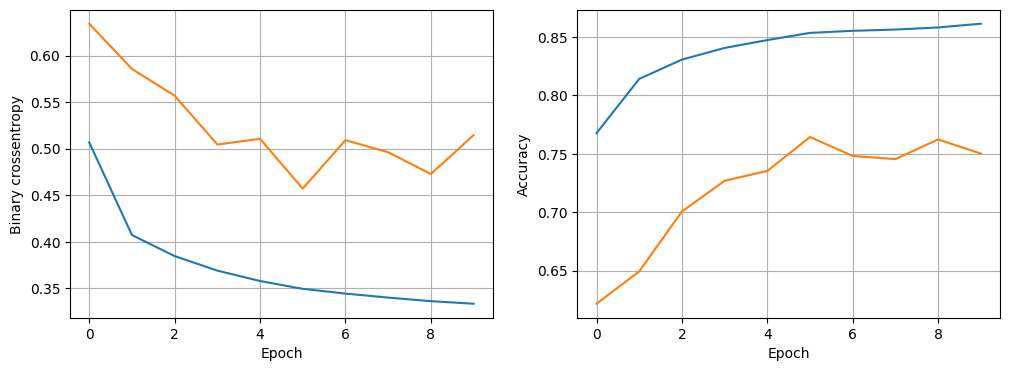

119/119 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8615
num_nodes: 16, dropout_prob: 0, lr: 0.001, batch_size: 64


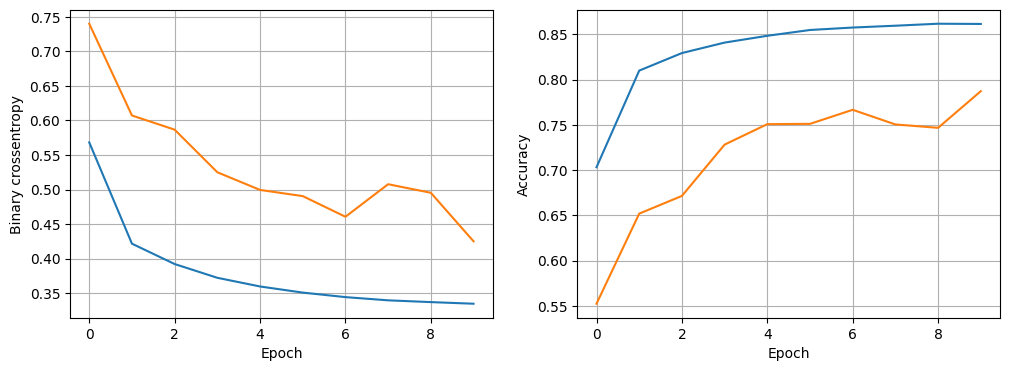

119/119 [==============================] - 0s 2ms/step - loss: 0.3403 - accuracy: 0.8615
num_nodes: 16, dropout_prob: 0, lr: 0.001, batch_size: 128


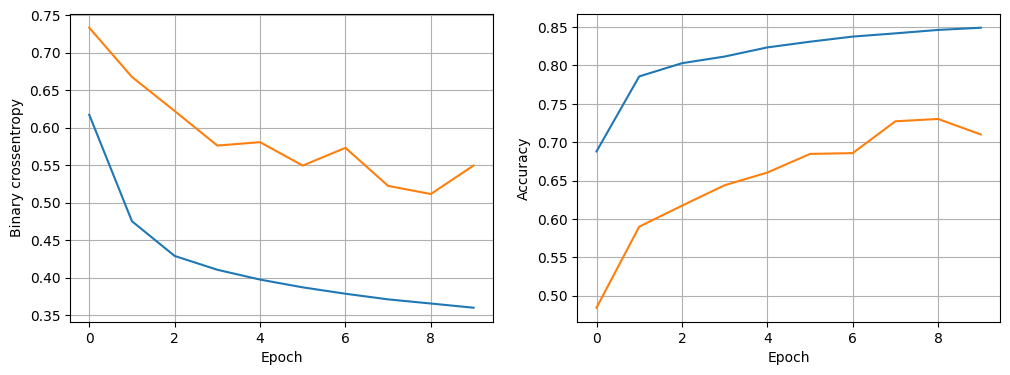

119/119 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8580
num_nodes: 16, dropout_prob: 0.2, lr: 0.01, batch_size: 32


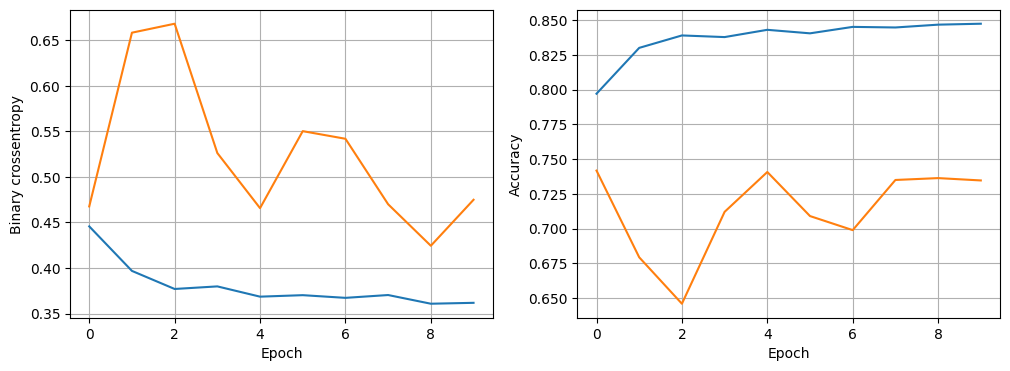

119/119 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8667
num_nodes: 16, dropout_prob: 0.2, lr: 0.01, batch_size: 64


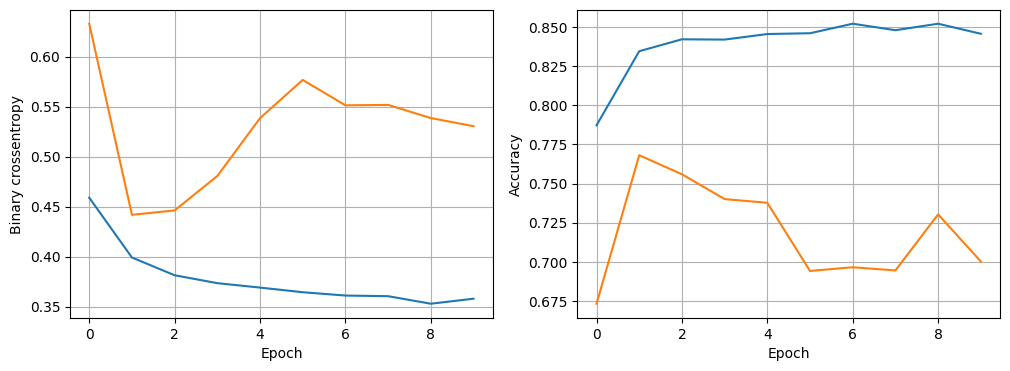

119/119 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8633
num_nodes: 16, dropout_prob: 0.2, lr: 0.01, batch_size: 128


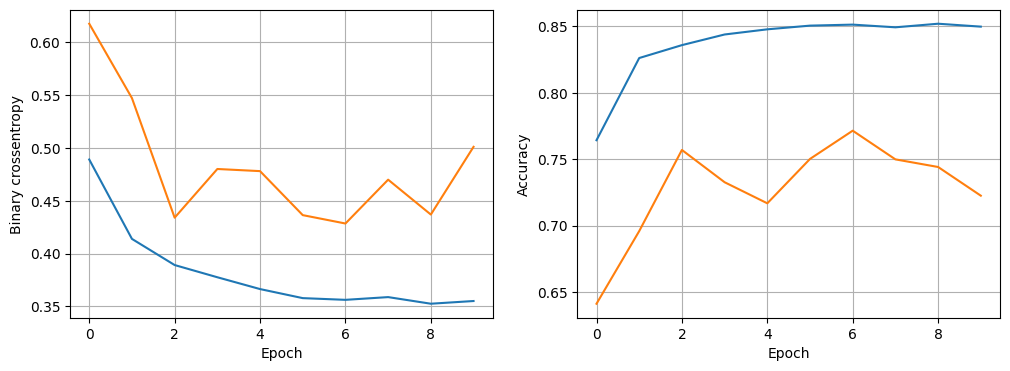

119/119 [==============================] - 0s 2ms/step - loss: 0.3199 - accuracy: 0.8636
num_nodes: 16, dropout_prob: 0.2, lr: 0.005, batch_size: 32


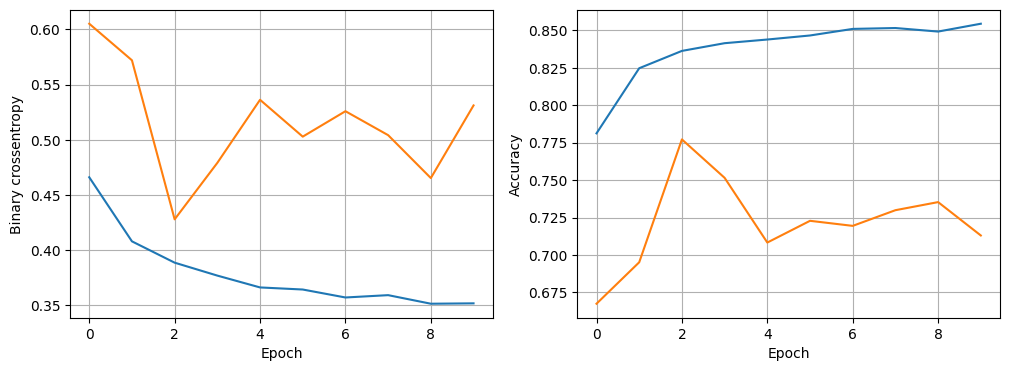

119/119 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8586
num_nodes: 16, dropout_prob: 0.2, lr: 0.005, batch_size: 64


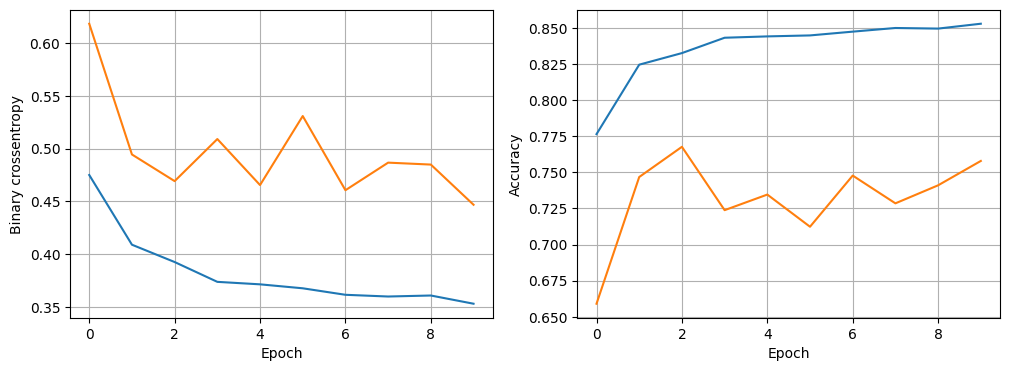

119/119 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8672
num_nodes: 16, dropout_prob: 0.2, lr: 0.005, batch_size: 128


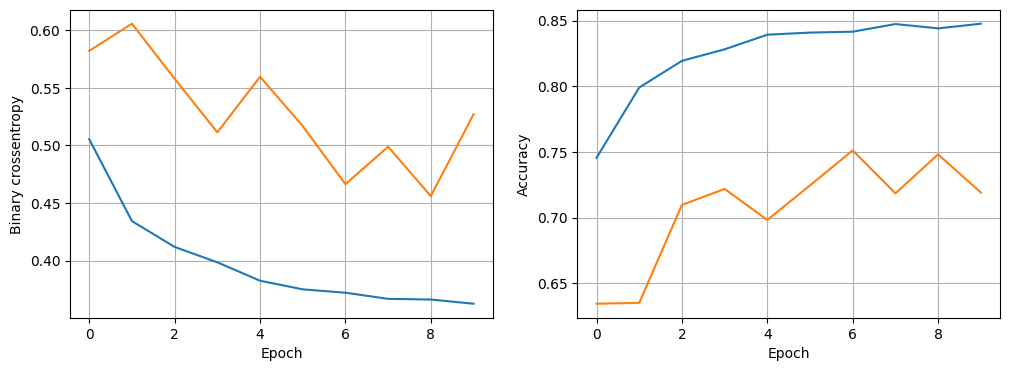

119/119 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.8649
num_nodes: 16, dropout_prob: 0.2, lr: 0.001, batch_size: 32


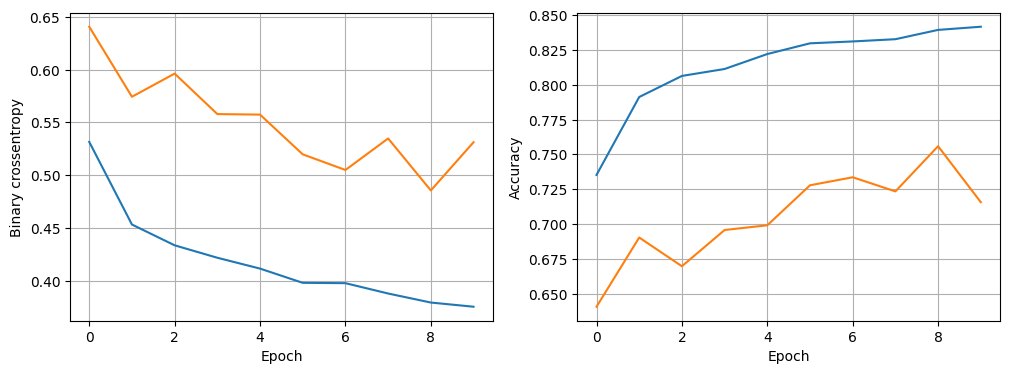

119/119 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8599
num_nodes: 16, dropout_prob: 0.2, lr: 0.001, batch_size: 64


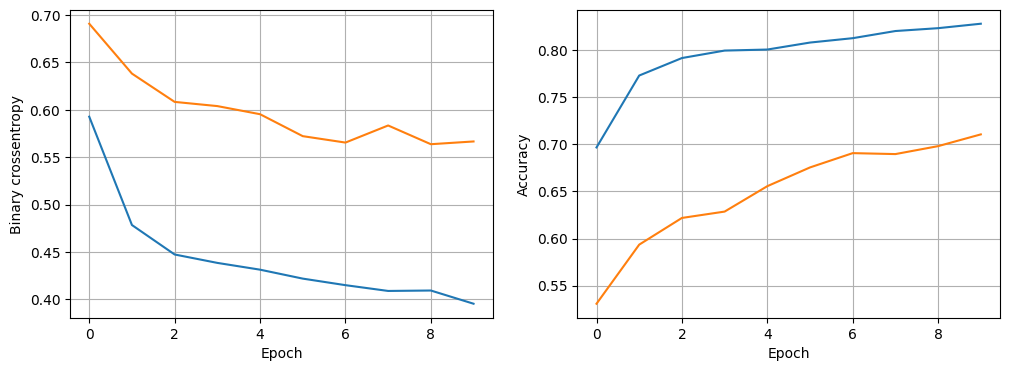

119/119 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8523
num_nodes: 16, dropout_prob: 0.2, lr: 0.001, batch_size: 128


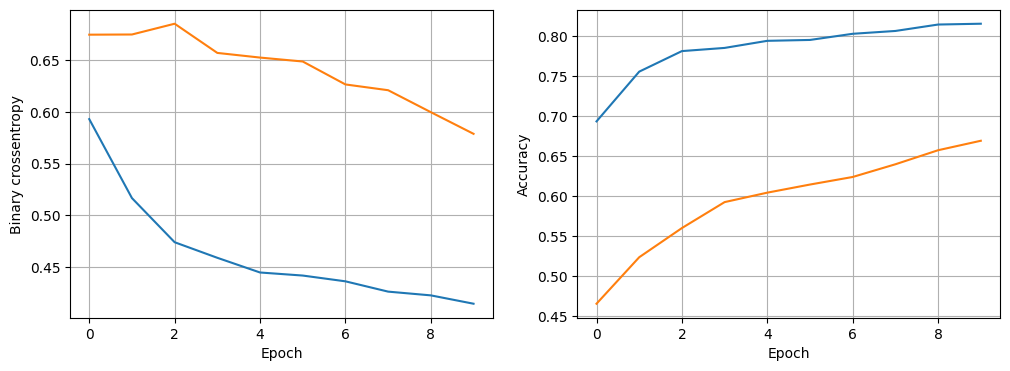

119/119 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8391
num_nodes: 32, dropout_prob: 0, lr: 0.01, batch_size: 32


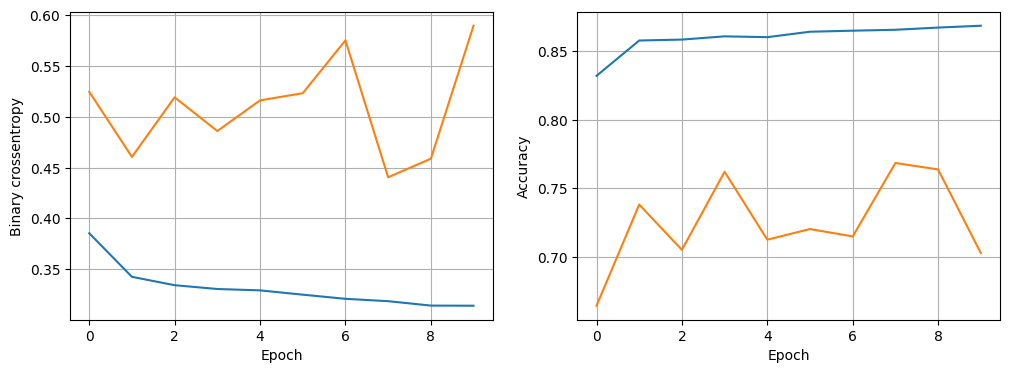

119/119 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8670
num_nodes: 32, dropout_prob: 0, lr: 0.01, batch_size: 64


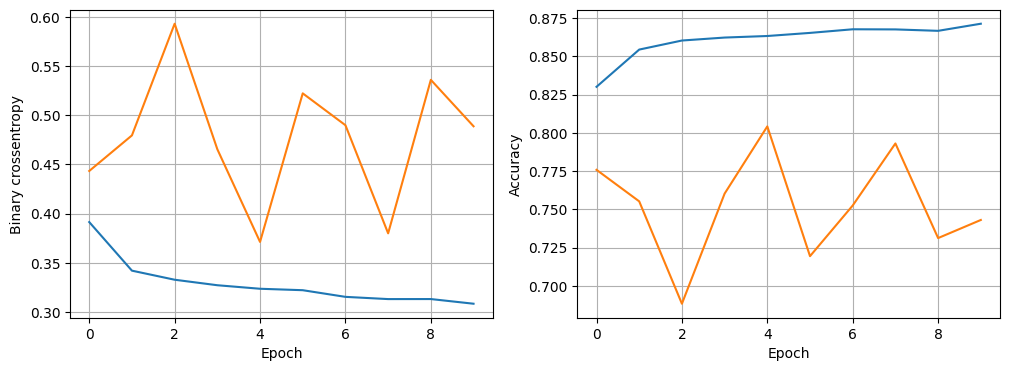

119/119 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8696
num_nodes: 32, dropout_prob: 0, lr: 0.01, batch_size: 128


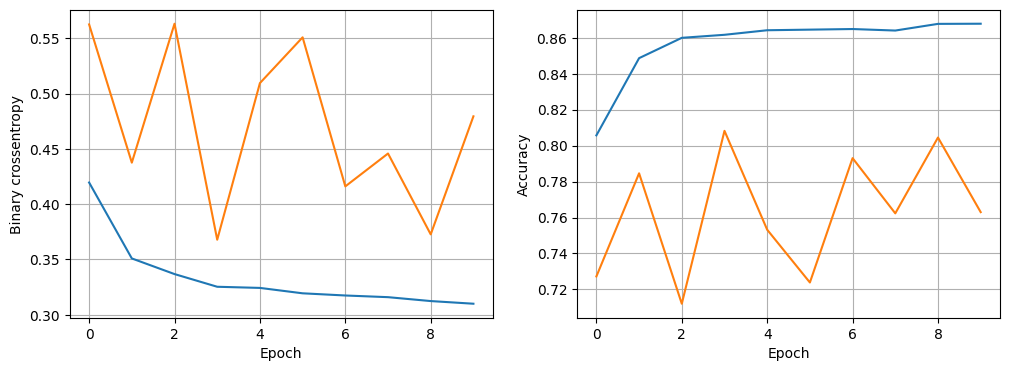

119/119 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8578
num_nodes: 32, dropout_prob: 0, lr: 0.005, batch_size: 32


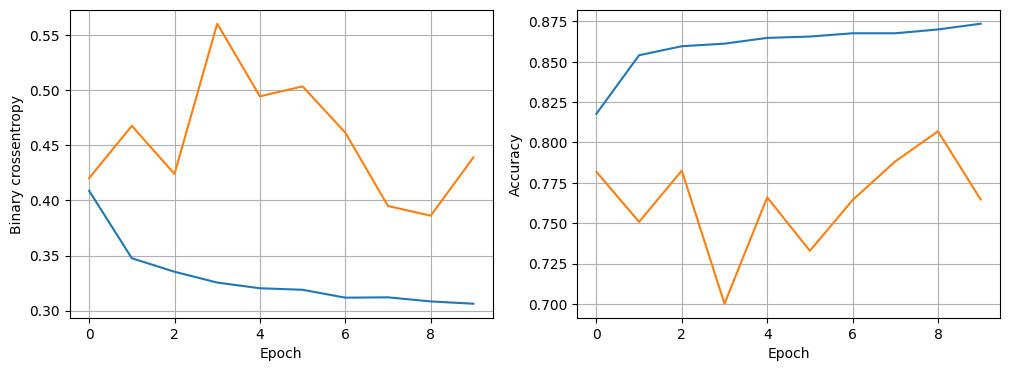

119/119 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8680
num_nodes: 32, dropout_prob: 0, lr: 0.005, batch_size: 64


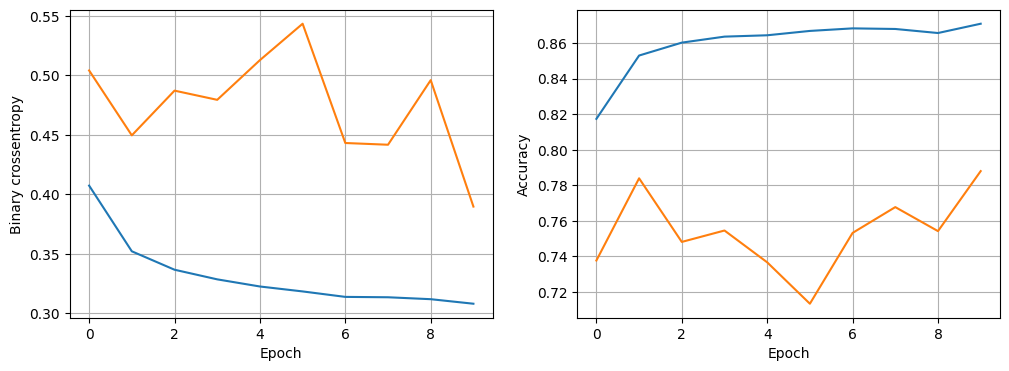

119/119 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8657
num_nodes: 32, dropout_prob: 0, lr: 0.005, batch_size: 128


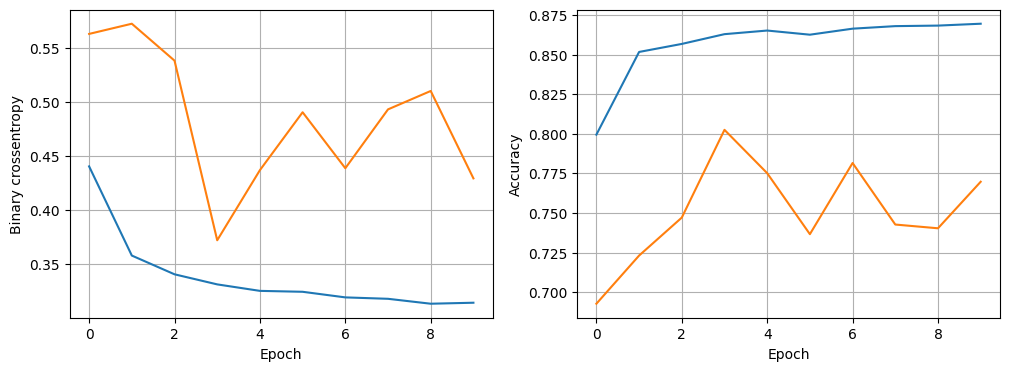

119/119 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.8617
num_nodes: 32, dropout_prob: 0, lr: 0.001, batch_size: 32


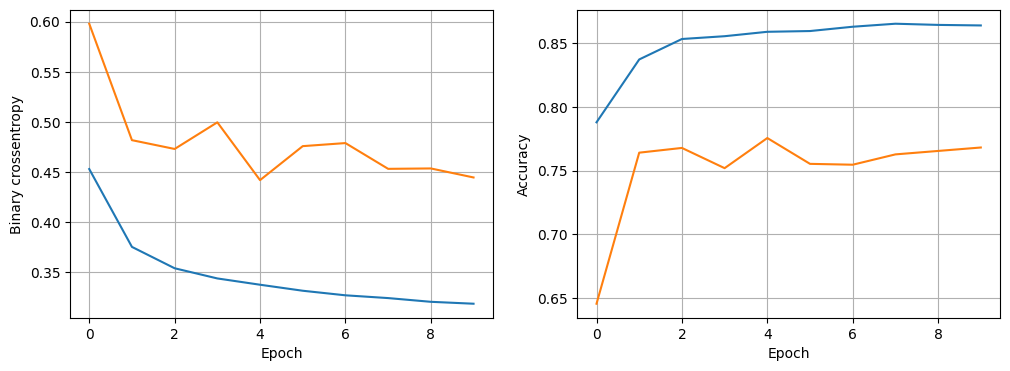

119/119 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8636
num_nodes: 32, dropout_prob: 0, lr: 0.001, batch_size: 64


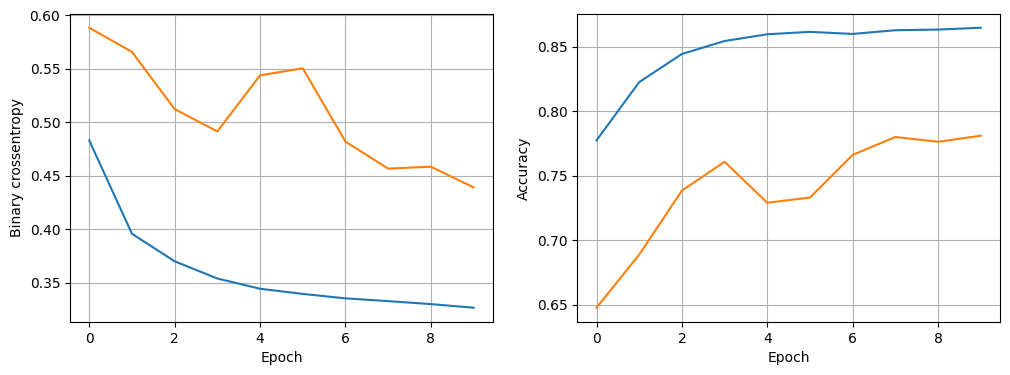

119/119 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8641
num_nodes: 32, dropout_prob: 0, lr: 0.001, batch_size: 128


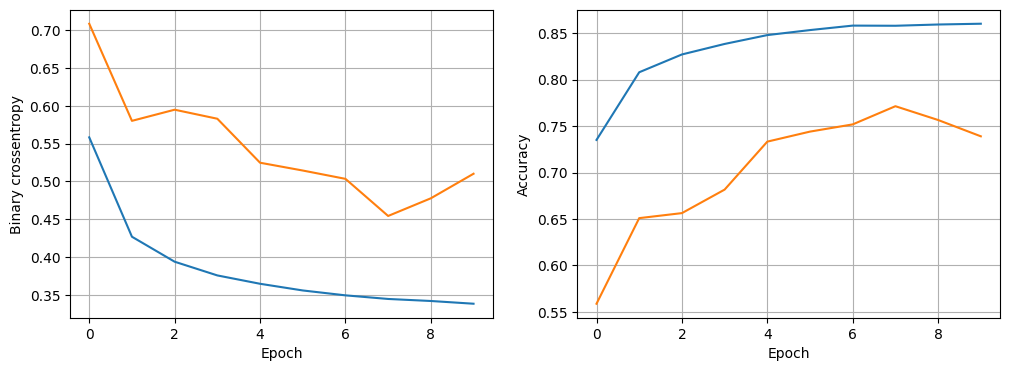

119/119 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8630
num_nodes: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 32


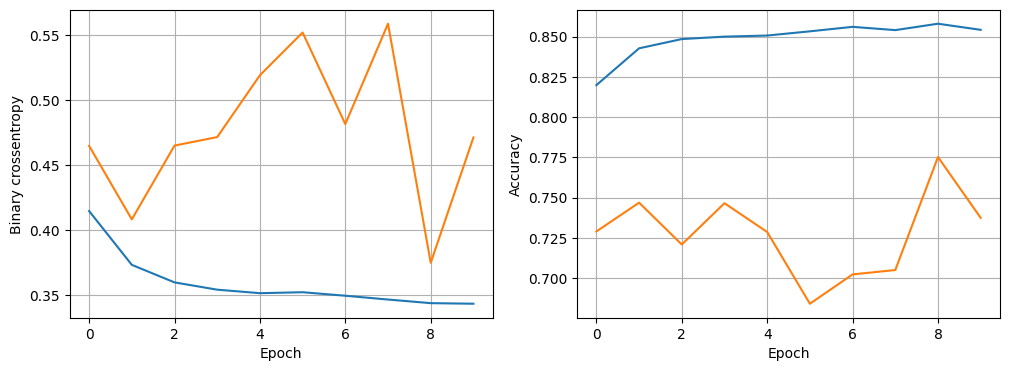

119/119 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8649
num_nodes: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 64


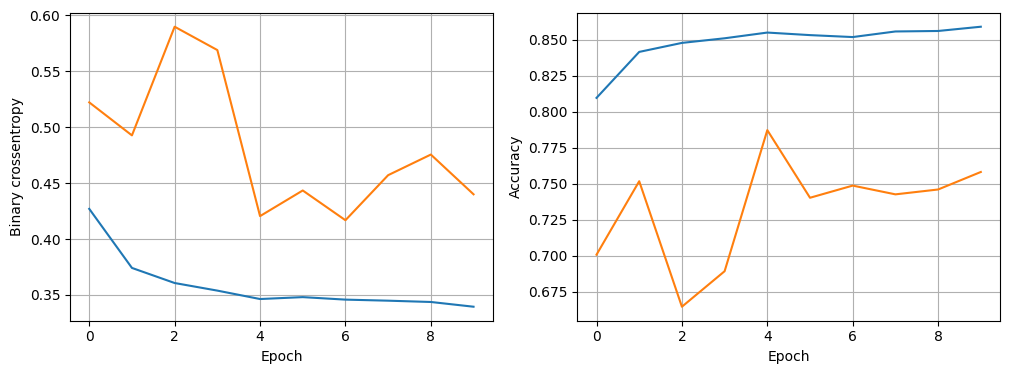

119/119 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.8693
num_nodes: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 128


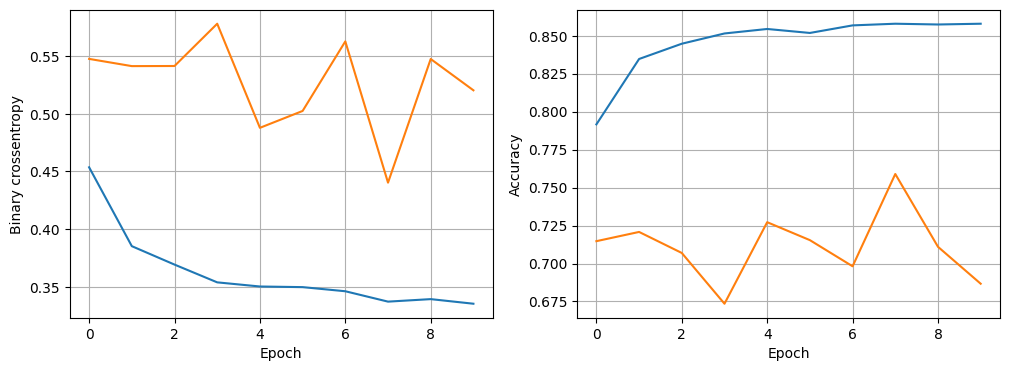

119/119 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8588
num_nodes: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 32


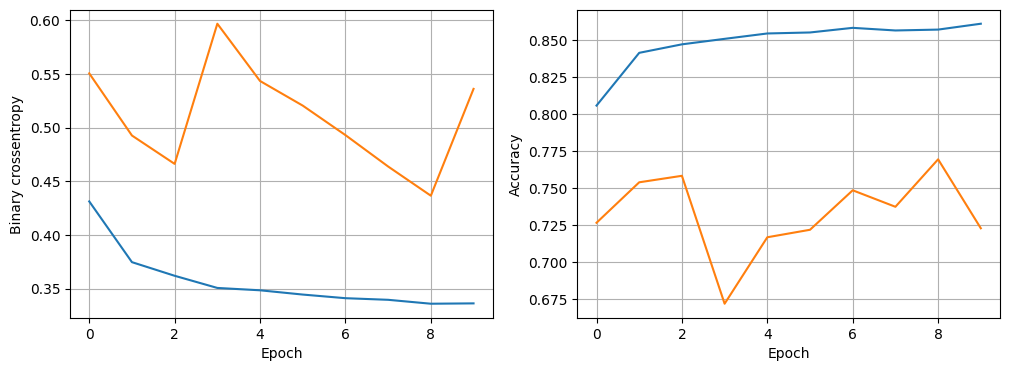

119/119 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8644
num_nodes: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 64


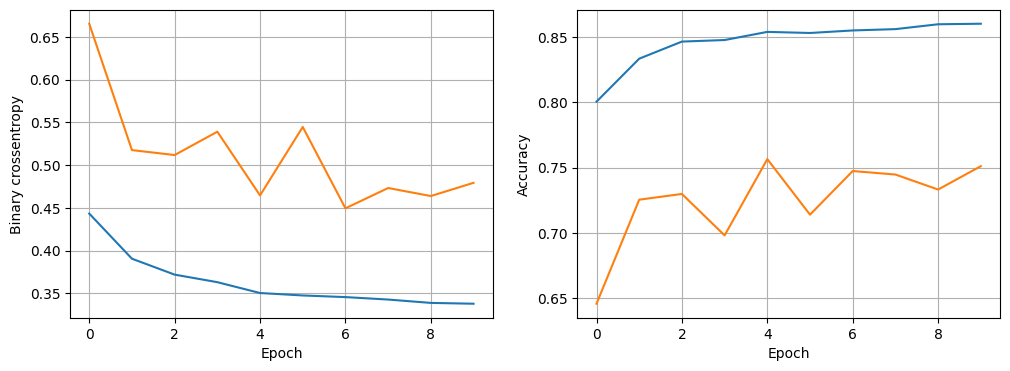

119/119 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8688
num_nodes: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 128


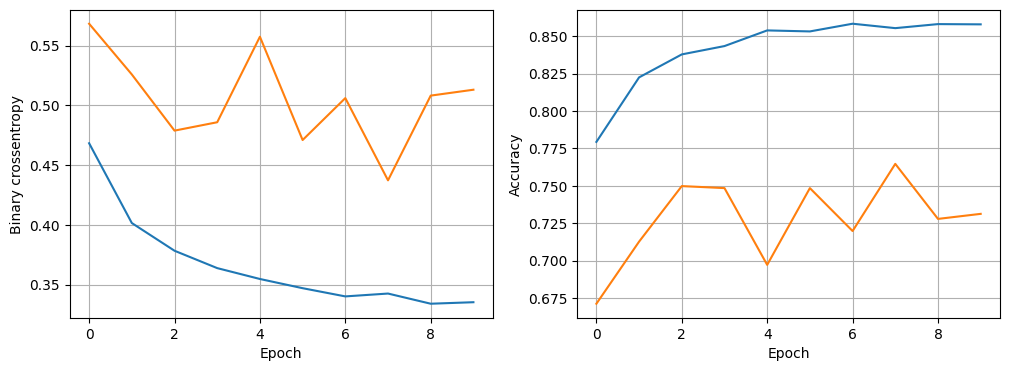

119/119 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.8649
num_nodes: 32, dropout_prob: 0.2, lr: 0.001, batch_size: 32


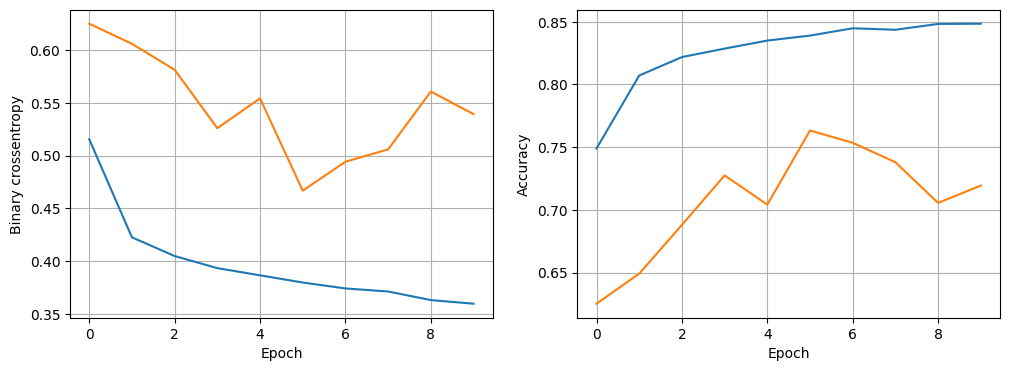

119/119 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8659
num_nodes: 32, dropout_prob: 0.2, lr: 0.001, batch_size: 64


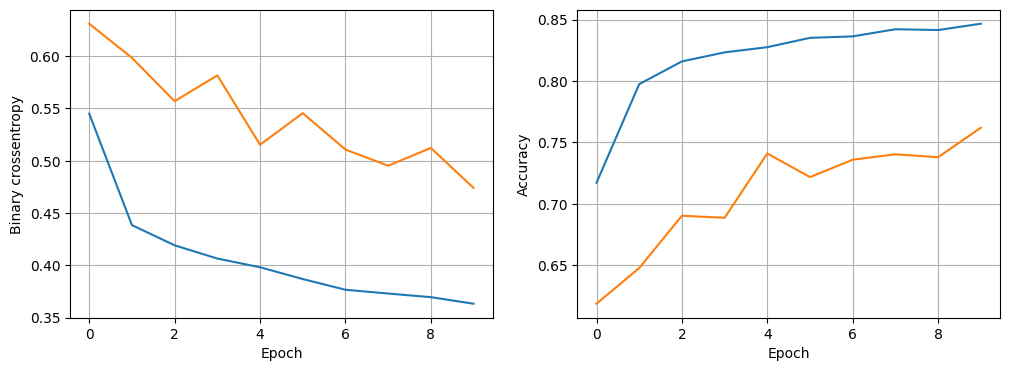

119/119 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8599
num_nodes: 32, dropout_prob: 0.2, lr: 0.001, batch_size: 128


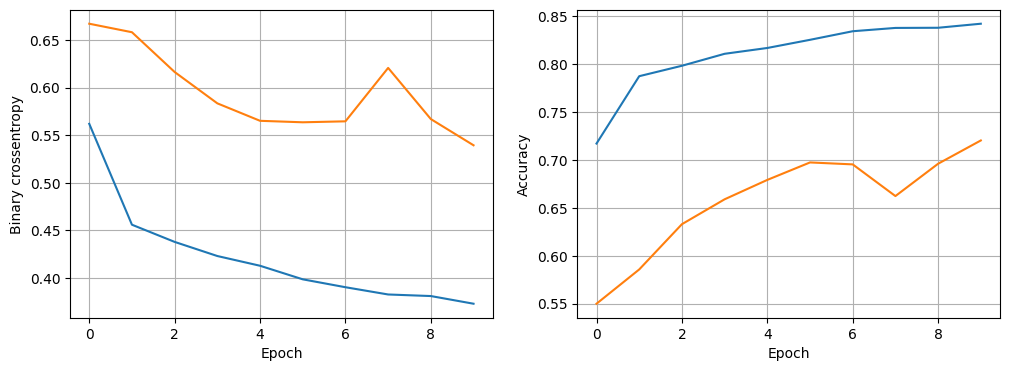

119/119 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8594
num_nodes: 64, dropout_prob: 0, lr: 0.01, batch_size: 32


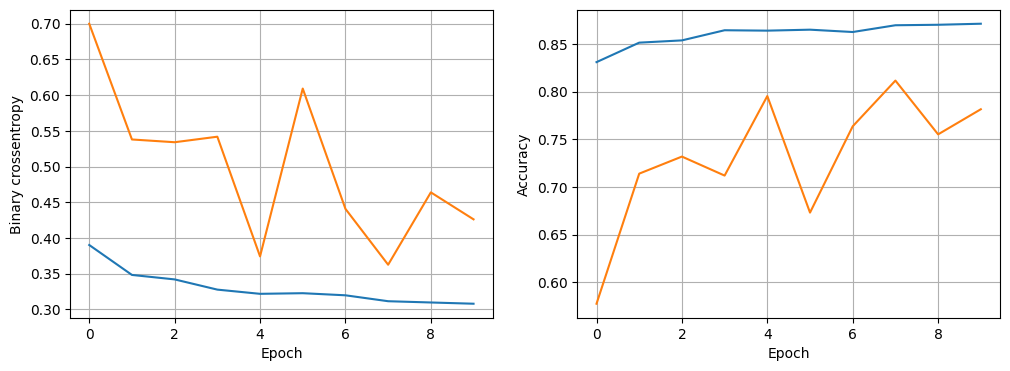

119/119 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8612
num_nodes: 64, dropout_prob: 0, lr: 0.01, batch_size: 64


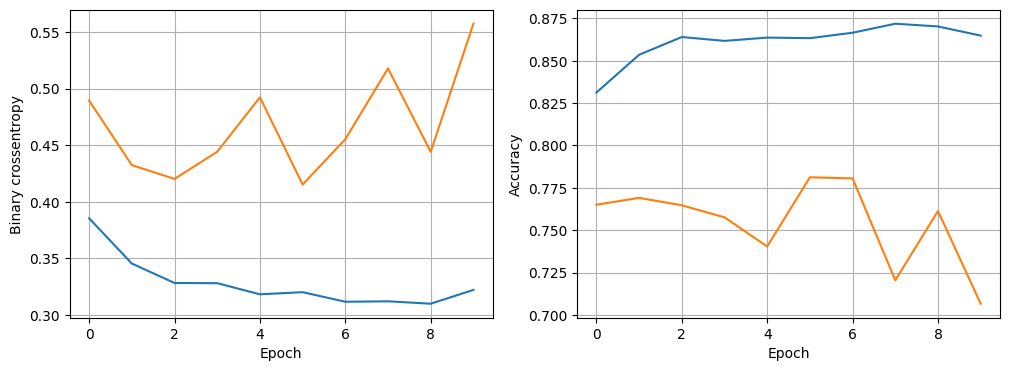

119/119 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8646
num_nodes: 64, dropout_prob: 0, lr: 0.01, batch_size: 128


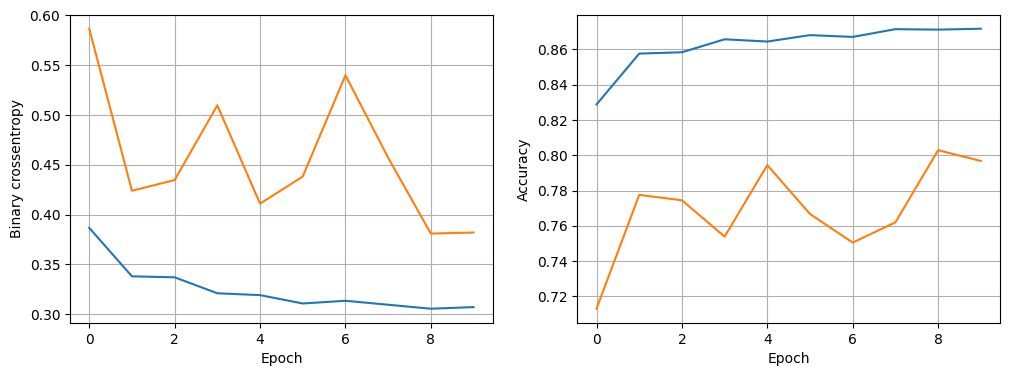

119/119 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8657
num_nodes: 64, dropout_prob: 0, lr: 0.005, batch_size: 32


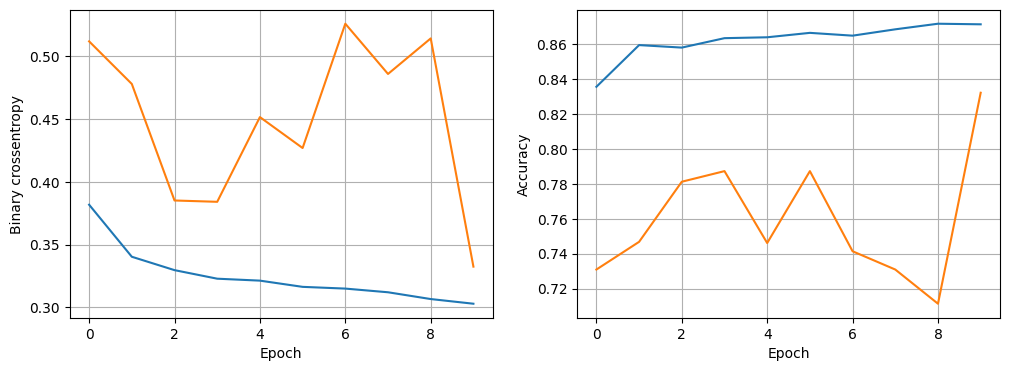

119/119 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8573
num_nodes: 64, dropout_prob: 0, lr: 0.005, batch_size: 64


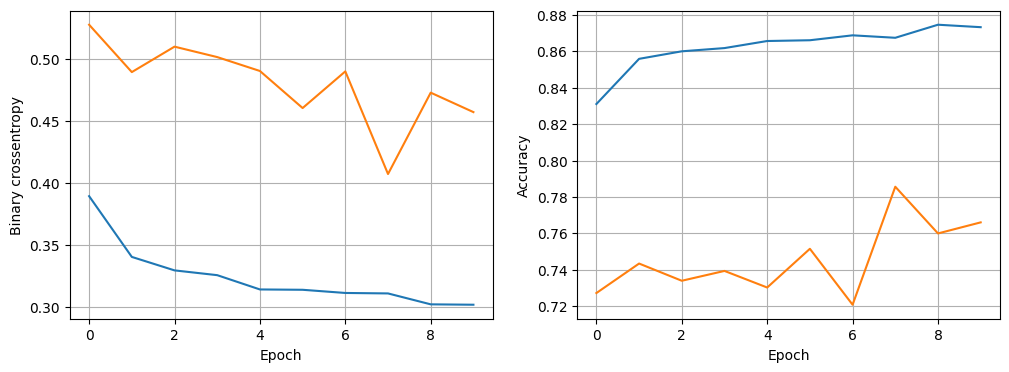

119/119 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8683
num_nodes: 64, dropout_prob: 0, lr: 0.005, batch_size: 128


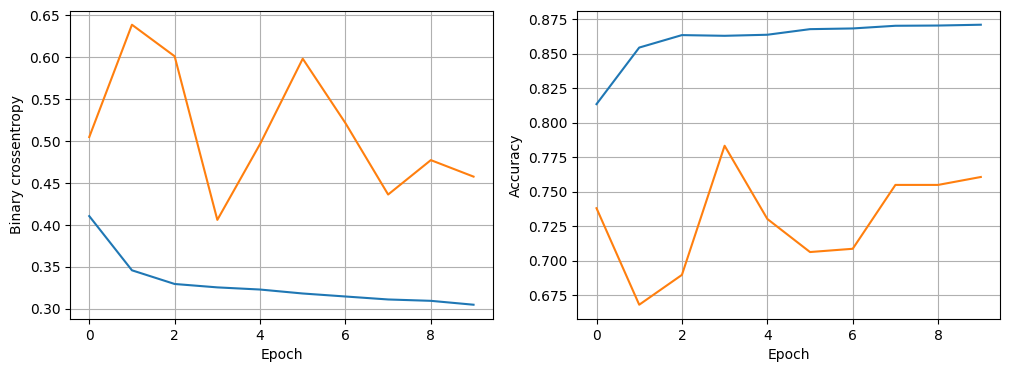

119/119 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8691
num_nodes: 64, dropout_prob: 0, lr: 0.001, batch_size: 32


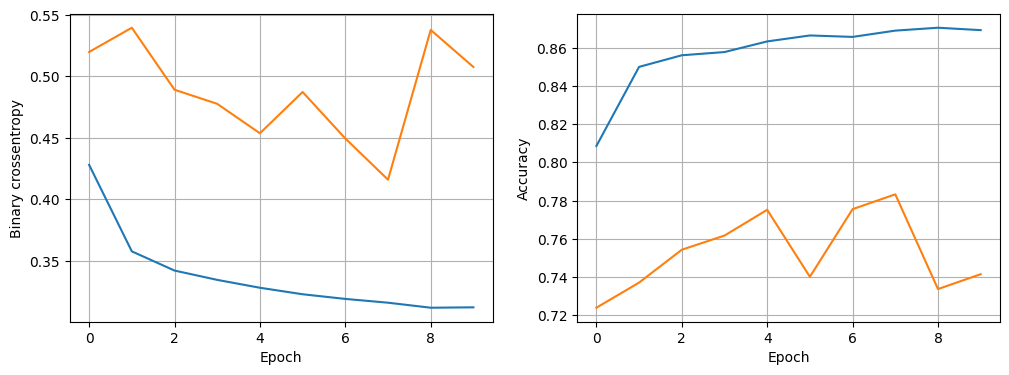

119/119 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8691
num_nodes: 64, dropout_prob: 0, lr: 0.001, batch_size: 64


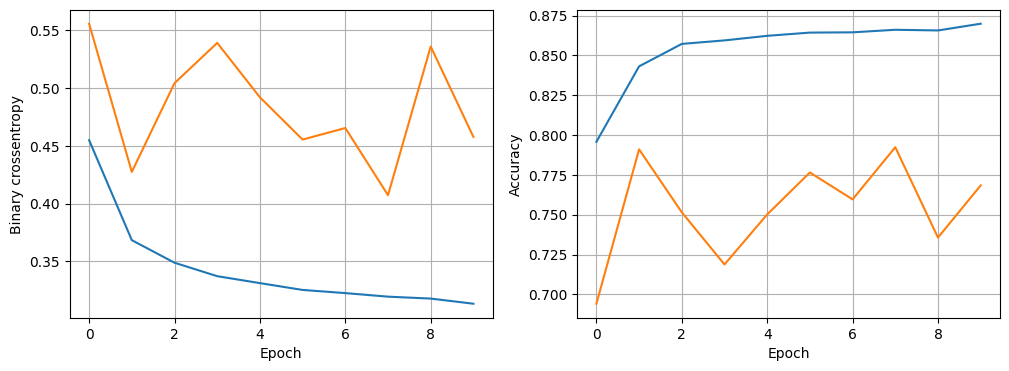

119/119 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8646
num_nodes: 64, dropout_prob: 0, lr: 0.001, batch_size: 128


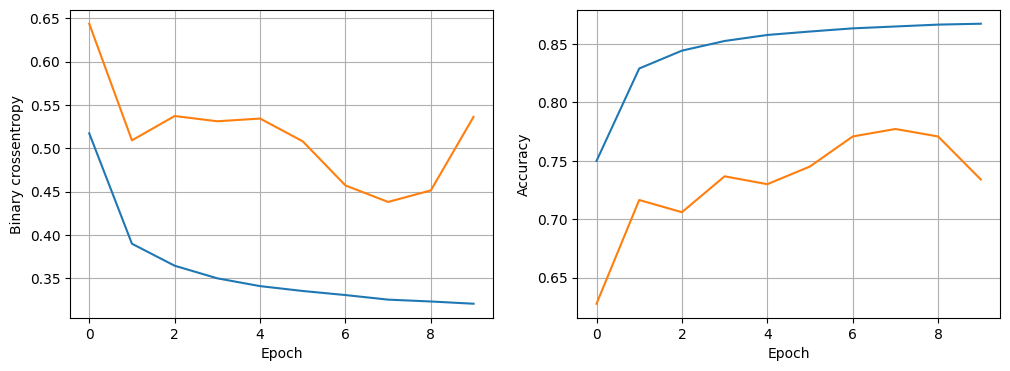

119/119 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8665
num_nodes: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 32


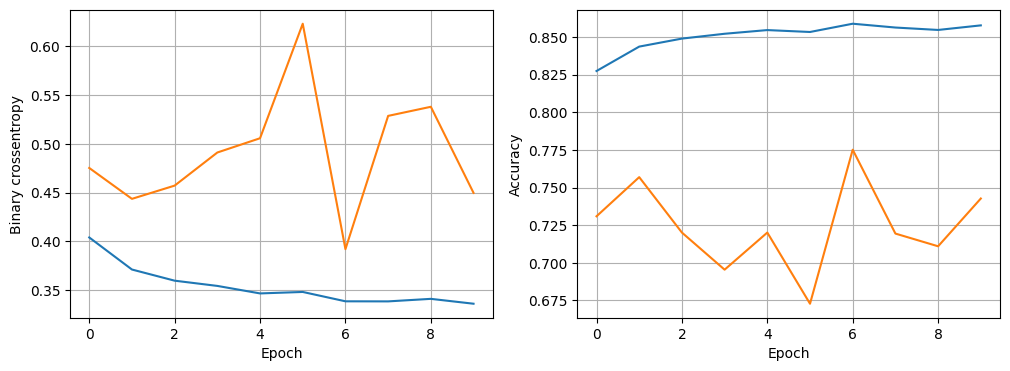

119/119 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8641
num_nodes: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 64


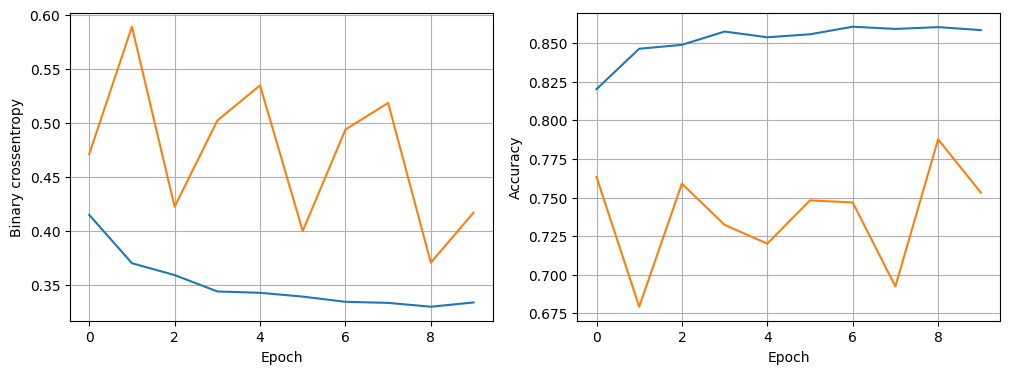

119/119 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8641
num_nodes: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 128


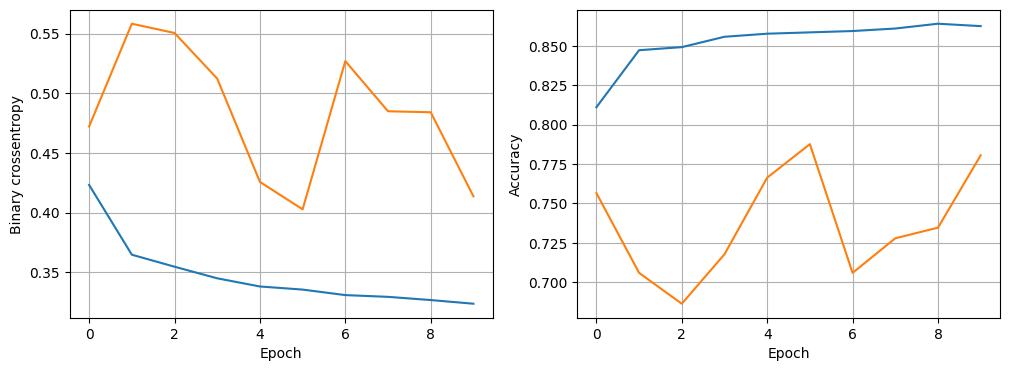

119/119 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8683
num_nodes: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 32


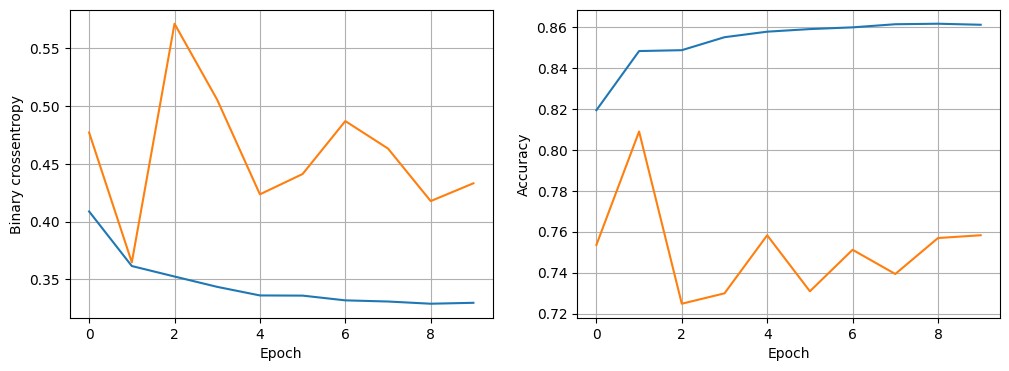

119/119 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8654
num_nodes: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 64


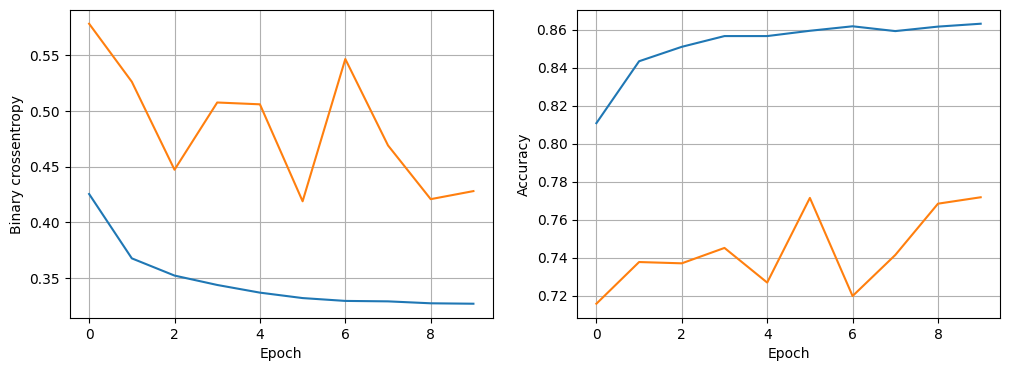

119/119 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8678
num_nodes: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 128


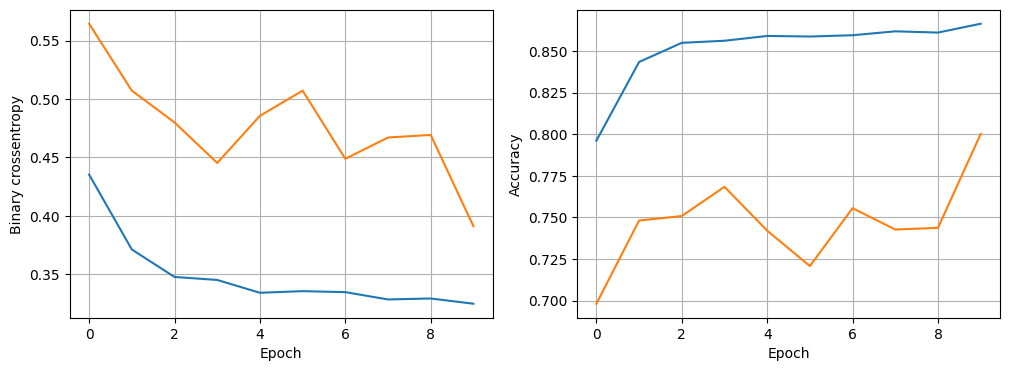

119/119 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8657
num_nodes: 64, dropout_prob: 0.2, lr: 0.001, batch_size: 32


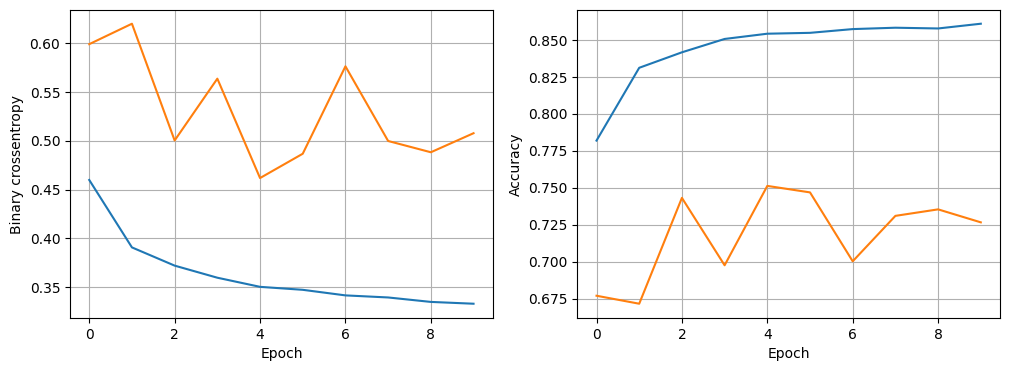

119/119 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8672
num_nodes: 64, dropout_prob: 0.2, lr: 0.001, batch_size: 64


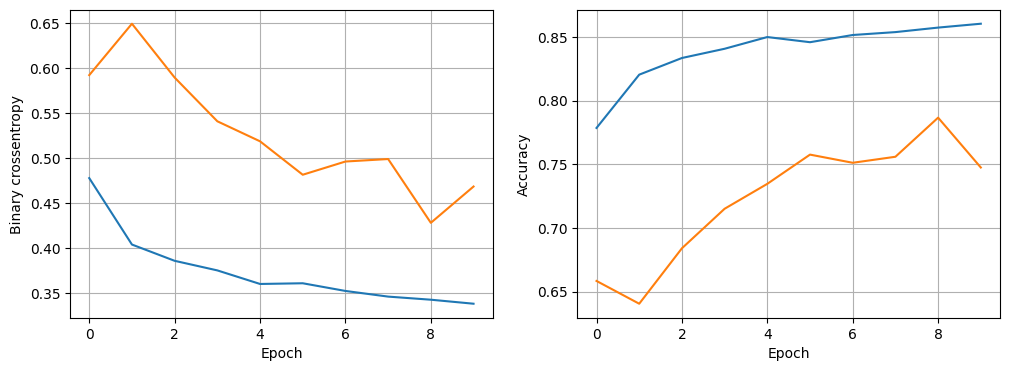

119/119 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.8630
num_nodes: 64, dropout_prob: 0.2, lr: 0.001, batch_size: 128


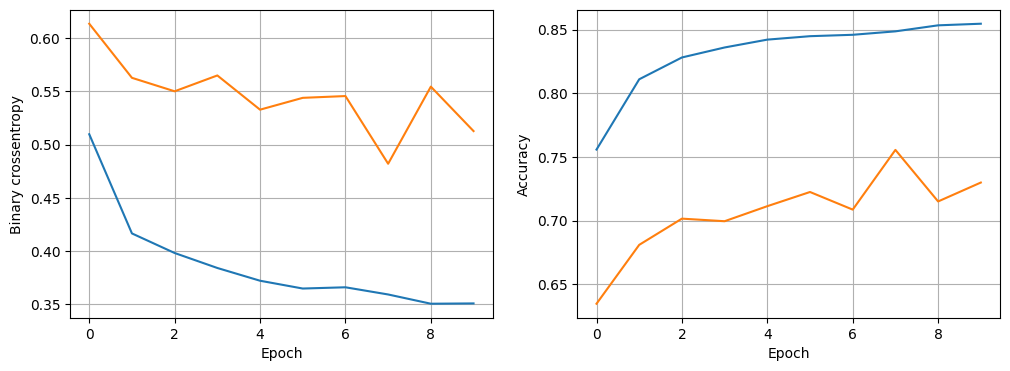

119/119 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8644


In [ ]:
least_val_loss = float('inf')
best_model = None
epochs= 10
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"num_nodes: {num_nodes}, dropout_prob: {dropout_prob}, lr: {lr}, batch_size: {batch_size}")
        model, history = train_model(x_train, y_train,num_nodes, dropout_prob, lr, epochs, batch_size)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          best_model = model

In [ ]:
y_pred = best_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


119/119 [==============================] - 0s 1ms/step
Accuracy: 87.20%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1341
           1       0.87      0.94      0.90      2463

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

